# Obesity Type Classification

In [1]:
from platform import python_version

print(python_version())

3.9.13


In [2]:
#importing basic library to perform EDA

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#importing dataset
person_data = pd.read_csv("ObesityDataSet\ObesityDataSet_raw_and_data_sinthetic.csv")
person_data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
person_data.tail()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III
2110,Female,23.664709,1.738836,133.472641,yes,yes,3.0,3.0,Sometimes,no,2.863513,no,1.026452,0.714137,Sometimes,Public_Transportation,Obesity_Type_III


In [5]:
# getting number of rows and columns
rows, columns = person_data.shape
print('Our dataset has {} rows and {} columns'.format(rows, columns))

Our dataset has 2111 rows and 17 columns


In [6]:
# printing all column names 
cols = list(person_data.columns.values)
print("List of columns in dataset: ")
for i in range(len(cols)):
    print(cols[i])

List of columns in dataset: 
Gender
Age
Height
Weight
family_history_with_overweight
FAVC
FCVC
NCP
CAEC
SMOKE
CH2O
SCC
FAF
TUE
CALC
MTRANS
NObeyesdad


In [7]:
# getiing column info
person_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [8]:
# converting age column data type to integer
person_data.Age = person_data.Age.astype(int) 

In [9]:
# getting statistical information of numerical columns
person_data.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,23.972525,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.308664,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.000000,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.000000,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [10]:
# finding NA or NUll values
person_data[:].isna().any()

Gender                            False
Age                               False
Height                            False
Weight                            False
family_history_with_overweight    False
FAVC                              False
FCVC                              False
NCP                               False
CAEC                              False
SMOKE                             False
CH2O                              False
SCC                               False
FAF                               False
TUE                               False
CALC                              False
MTRANS                            False
NObeyesdad                        False
dtype: bool

In [11]:
# getting all unique values for Obesity type column
uniqueValuesObe = (person_data['NObeyesdad']).unique()
uniqueValuesObe

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

In [12]:
person_data.NObeyesdad[0]

'Normal_Weight'

In [13]:
# reducing number of classes from 7 to 4
for i in range(person_data.shape[0]):
    if person_data.NObeyesdad[i] in ["Overweight_Level_I", "Overweight_Level_II"] :
        #print("Was :", person_data.NObeyesdad[i])
        person_data.NObeyesdad[i] = "Overweight"
        #person_data.iloc[i, 16] = "Obese"
        #print("New: ", person_data.NObeyesdad[i])
    elif person_data.NObeyesdad[i] in ["Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"]:
        person_data.NObeyesdad[i] = "Obese"
    else:
        None

C:\Users\Echo\AppData\Local\Temp\ipykernel_10540\1828958872.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  person_data.NObeyesdad[i] = "Overweight"
C:\Users\Echo\AppData\Local\Temp\ipykernel_10540\1828958872.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  person_data.NObeyesdad[i] = "Obese"


In [14]:
# getting all unique values for Obesity type column
uniqueValuesObe = (person_data['NObeyesdad']).unique()
uniqueValuesObe

array(['Normal_Weight', 'Overweight', 'Obese', 'Insufficient_Weight'],
      dtype=object)

In [15]:
person_data.head(10)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight
4,Male,22,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight
5,Male,29,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,Female,23,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,Male,22,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,Male,24,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
9,Male,22,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight


In [16]:
person_data.tail()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
2106,Female,20,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obese
2107,Female,21,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obese
2108,Female,22,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obese
2109,Female,24,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obese
2110,Female,23,1.738836,133.472641,yes,yes,3.0,3.0,Sometimes,no,2.863513,no,1.026452,0.714137,Sometimes,Public_Transportation,Obese


In [17]:
# creating a list of columns with string data for converting its values to numerical form
textual_data = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']

In [18]:
# importing LabelEncoder to perform enchoding
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df = person_data.copy()
for col in textual_data:
    df[col] = encoder.fit_transform(person_data[col])
df.head(10)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,1
1,0,21,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,1
2,1,23,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,1
3,1,27,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,3
4,1,22,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,3
5,1,29,1.62,53.0,0,1,2.0,3.0,2,0,2.0,0,0.0,0.0,2,0,1
6,0,23,1.50,55.0,1,1,3.0,3.0,2,0,2.0,0,1.0,0.0,2,2,1
7,1,22,1.64,53.0,0,0,2.0,3.0,2,0,2.0,0,3.0,0.0,2,3,1
8,1,24,1.78,64.0,1,1,3.0,3.0,2,0,2.0,0,1.0,1.0,1,3,1
9,1,22,1.72,68.0,1,1,2.0,3.0,2,0,2.0,0,1.0,1.0,3,3,1


In [19]:
df.tail()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
2106,0,20,1.710730,131.408528,1,1,3.0,3.0,2,0,1.728139,0,1.676269,0.906247,2,3,2
2107,0,21,1.748584,133.742943,1,1,3.0,3.0,2,0,2.005130,0,1.341390,0.599270,2,3,2
2108,0,22,1.752206,133.689352,1,1,3.0,3.0,2,0,2.054193,0,1.414209,0.646288,2,3,2
2109,0,24,1.739450,133.346641,1,1,3.0,3.0,2,0,2.852339,0,1.139107,0.586035,2,3,2
2110,0,23,1.738836,133.472641,1,1,3.0,3.0,2,0,2.863513,0,1.026452,0.714137,2,3,2


In [20]:
# finding number of males and females in dataset
num_fem = df[df['Gender'] == 0]
print("Number of females: ", len(num_fem))
print("Number of males: ", df.shape[0] - len(num_fem))

Number of females:  1043
Number of males:  1068


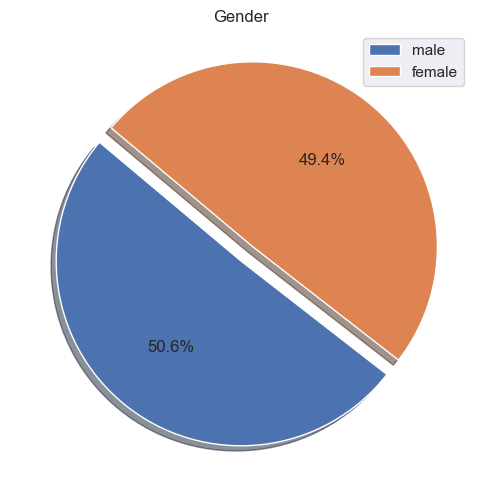

In [100]:
# plotting pie chart for gender column
plt.figure(figsize=(6,6))
explode = [0,0.1]
plt.pie(df['Gender'].value_counts(), explode=explode, 
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.legend(labels=['male','female'])
plt.title('Gender')
plt.axis('off')
plt.show()

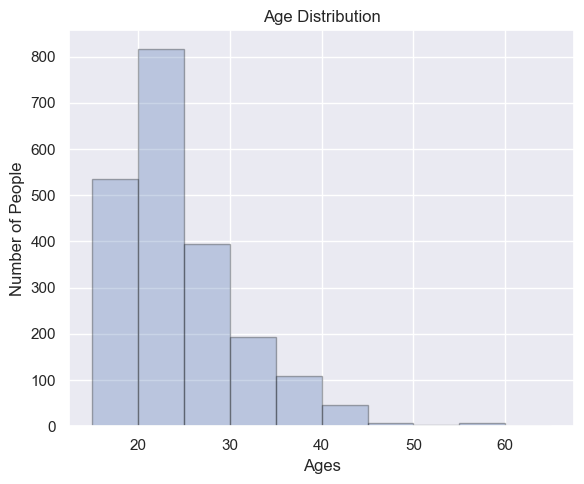

In [101]:
# plotting histogram for age distribution 
fig = plt.figure(figsize = (6, 5))
bins = [15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65]
plt.hist(df['Age'], bins=bins, edgecolor='black',  alpha=0.3)
plt.title('Age Distribution')
plt.xlabel('Ages')
plt.ylabel('Number of People')
plt.tight_layout()
#plt.savefig('age_distribution.png')

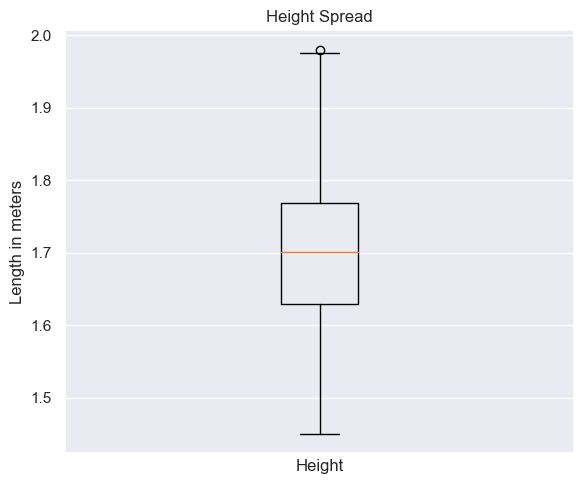

In [102]:
# plotting boxplot for height column
fig = plt.figure(figsize = (6, 5))
plt.boxplot((df.Height))
plt.title('Height Spread')
plt.xticks(ticks = [0], labels = ['Height'])
plt.xlabel('Height')
plt.ylabel('Length in meters')
plt.tight_layout()
#plt.savefig('Height Spread.png');
plt.show()

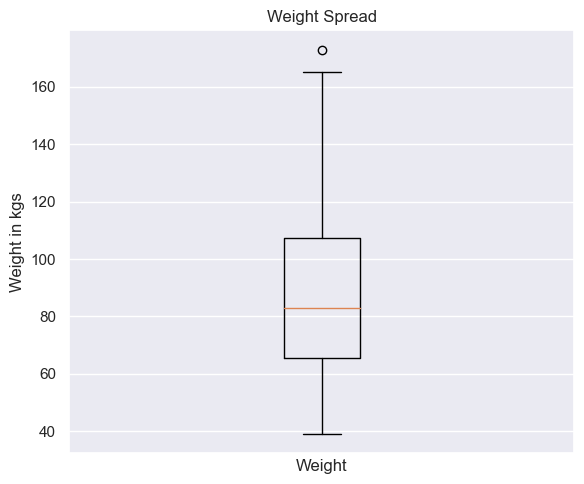

In [103]:
# plotting box plot for weight column
fig = plt.figure(figsize = (6, 5))

plt.boxplot((df.Weight))
plt.title('Weight Spread')
plt.xticks(ticks = [0], labels = ['Weight'])
plt.xlabel('Weight')
plt.ylabel('Weight in kgs')
plt.tight_layout()
#plt.savefig('weight spread.png')
plt.show();

In [25]:
# finding number of people with family history of obesity
num_with_family_hist = df[df['family_history_with_overweight'] == 1]
print("Number of people with family history of obesity: ", len(num_with_family_hist))
print("Number of people with no family history of obesity:: ", df.shape[0] - len(num_with_family_hist))
family_hist_obe = [df.shape[0] - len(num_with_family_hist), len(num_with_family_hist)]
Unique_fam_hist = [df.family_history_with_overweight.unique()]

Number of people with family history of obesity:  1726
Number of people with no family history of obesity::  385


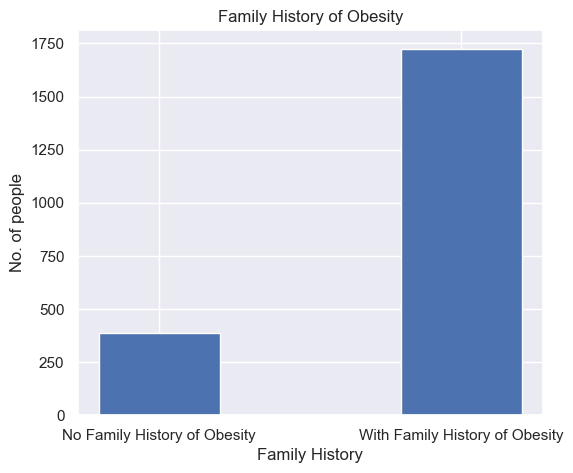

In [104]:
# plotting bar chart to represent number of people with family history of obesity
fig = plt.figure(figsize = (6, 5))

x = np.linspace(0, 1, 2)
plt.bar(x, family_hist_obe, width = 0.4)
plt.xticks(ticks = [0, 1], labels = ['No Family History of Obesity', 'With Family History of Obesity'])
plt.xlabel("Family History")
plt.ylabel("No. of people")
plt.title("Family History of Obesity")
plt.show()

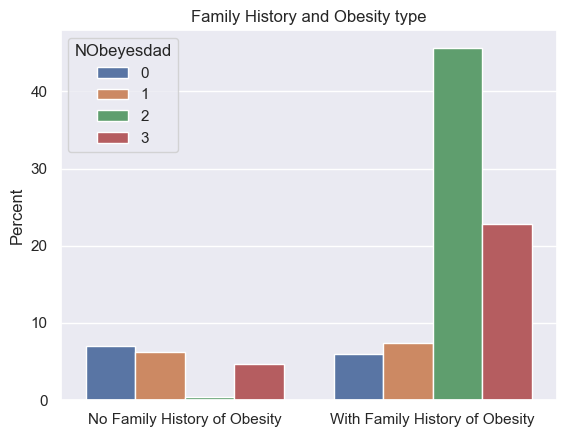

In [105]:
# plotting barplot of number of people with family history of obesity and comparision with Obesity type
ax = sns.barplot(x="family_history_with_overweight", y="family_history_with_overweight", 
                 hue="NObeyesdad", data=df, estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Percent")
ax.set(xticklabels=['No Family History of Obesity', 'With Family History of Obesity'])
plt.title('Family History and Obesity type')
plt.xlabel('')
#plt.savefig('Family hist and obesity.png')
plt.show()

In [28]:
# finding number of people with high calorie intake
num_high_cal_con = df[df['FAVC'] == 1]
print("Number of people with High Calroic Food Consumption: ", len(num_high_cal_con))
print("Number of people with Low Calroic Food Consumption: ", df.shape[0] - len(num_high_cal_con))
high_cal_con = [df.shape[0] - len(num_high_cal_con), len(num_high_cal_con)]
Unique_high_cal_con = [df.FAVC.unique()]

Number of people with High Calroic Food Consumption:  1866
Number of people with Low Calroic Food Consumption:  245


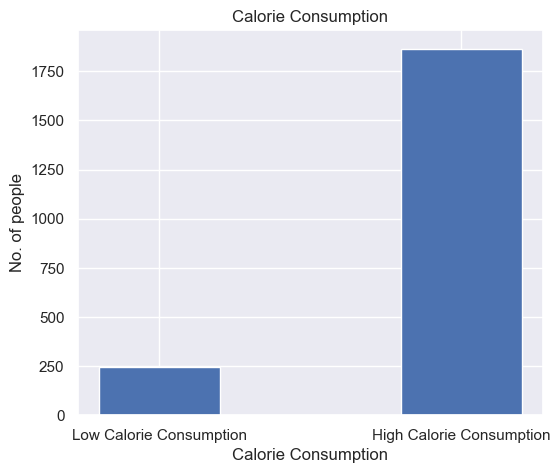

In [106]:
# plotting bar chart to vizualise peoples calorie consumption
fig = plt.figure(figsize = (6, 5))

x = np.linspace(0, 1, 2)
plt.bar(x, high_cal_con, width = 0.4)
plt.xticks(ticks = [0, 1], labels = ['Low Calorie Consumption', 'High Calorie Consumption'])
plt.xlabel("Calorie Consumption")
plt.ylabel("No. of people")
plt.title("Calorie Consumption")
plt.show()

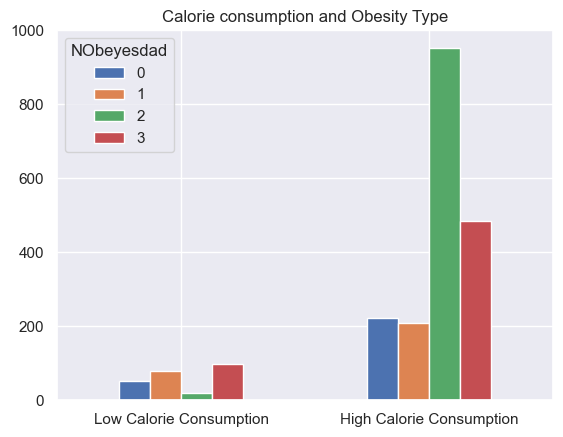

In [107]:
# plotting bar chart to vizualise peoples calorie consumption along with obesity type
df.groupby(['FAVC','NObeyesdad']).size().unstack().plot(kind='bar',stacked=False)
plt.xticks(ticks = [0, 1], labels = ['Low Calorie Consumption', 'High Calorie Consumption'], rotation = '0')
plt.title('Calorie consumption and Obesity Type')
plt.xlabel('')
#plt.savefig('Calorie consumption and Obesity Type.png')
plt.show()

In [31]:
# performing data wrangling on FCVC
for i in range(df.shape[0]):
    df.FCVC[i] = np.round(df.FCVC[i])

C:\Users\Echo\AppData\Local\Temp\ipykernel_10540\219794856.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.FCVC[i] = np.round(df.FCVC[i])


In [32]:
df.FCVC.unique()

array([2., 3., 1.])

In [33]:
# finding number of people's vegetable consumption 
num_veg_con_most = df[df['FCVC'] == 3.0]
num_veg_con_mid = df[df['FCVC'] == 2.0]
num_veg_con_low = df[df['FCVC'] == 1.0]

print("Number of people regular vegetable consumption: ", len(num_veg_con_most))
print("Number of people moderate vegetable consumption: ", len(num_veg_con_mid))
print("Number of people low or no vegetable consumption: ", len(num_veg_con_low))

veg_con = [len(num_veg_con_most), len(num_veg_con_mid), len(num_veg_con_low)]
Unique_veg_con = [df.FCVC.unique()]

Number of people regular vegetable consumption:  996
Number of people moderate vegetable consumption:  1013
Number of people low or no vegetable consumption:  102


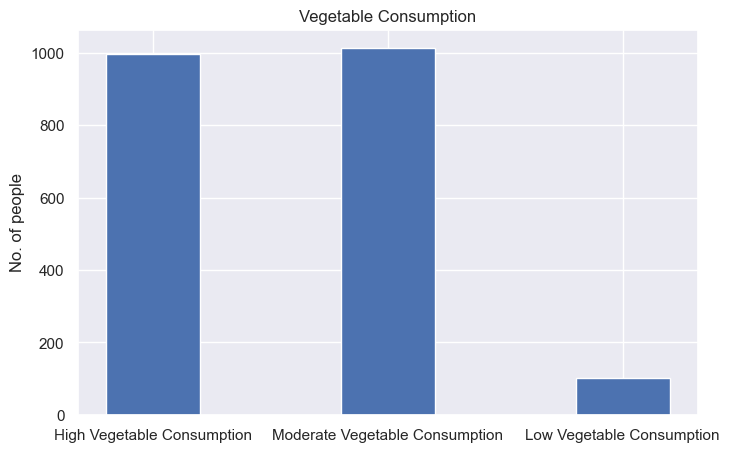

In [108]:
#
fig = plt.figure(figsize = (8, 5))

x = np.linspace(1, 3, 3)
plt.bar(x, veg_con, width = 0.4)
plt.xticks(ticks = [1, 2, 3], labels = ['High Vegetable Consumption', 'Moderate Vegetable Consumption', 'Low Vegetable Consumption'])
#plt.xlabel("Vegetable Consumption")
plt.ylabel("No. of people")
plt.title("Vegetable Consumption")
plt.show()

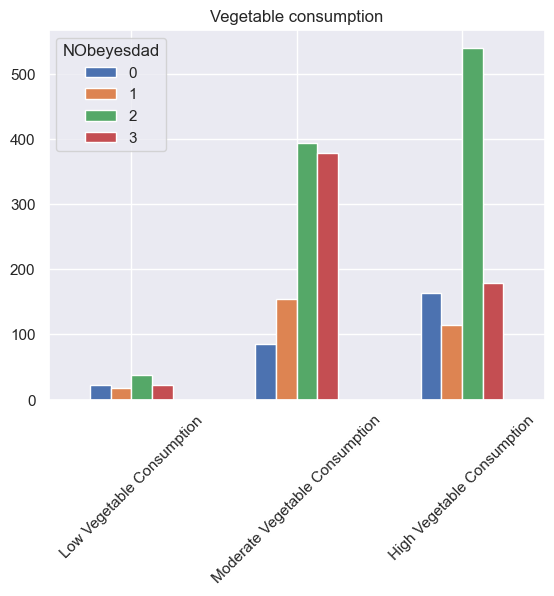

In [109]:
df.groupby(['FCVC','NObeyesdad']).size().unstack().plot(kind='bar',stacked=False)
plt.xticks(ticks = [0, 1, 2], labels = ['Low Vegetable Consumption', 'Moderate Vegetable Consumption', 'High Vegetable Consumption'],
          rotation = '45')
plt.title('Vegetable consumption')
plt.xlabel('')
plt.show()

In [36]:
# performing data wrangling on NCP
for i in range(df.shape[0]):
    df.NCP[i] = np.round(df.NCP[i])

C:\Users\Echo\AppData\Local\Temp\ipykernel_10540\1894024384.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.NCP[i] = np.round(df.NCP[i])


In [37]:
df.NCP.unique()

array([3., 1., 4., 2.])

In [38]:
num_of_meal_4 = df[df['NCP'] == 4]
num_of_meal_3 = df[df['NCP'] == 3]
num_of_meal_2 = df[df['NCP'] == 2]
num_of_meal_1 = df[df['NCP'] == 1]

print("Number of people with 4 meals a day: ", len(num_of_meal_4))
print("Number of people with 3 meals a day: ", len(num_of_meal_3))
print("Number of people with 2 meals a day: ", len(num_of_meal_2))
print("Number of people with 1 meals a day: ", len(num_of_meal_1))

num_meals = [len(num_of_meal_4), len(num_of_meal_3), len(num_of_meal_2), len(num_of_meal_1)]
Unique_veg_con = [df.FCVC.unique()]

Number of people with 4 meals a day:  149
Number of people with 3 meals a day:  1470
Number of people with 2 meals a day:  176
Number of people with 1 meals a day:  316


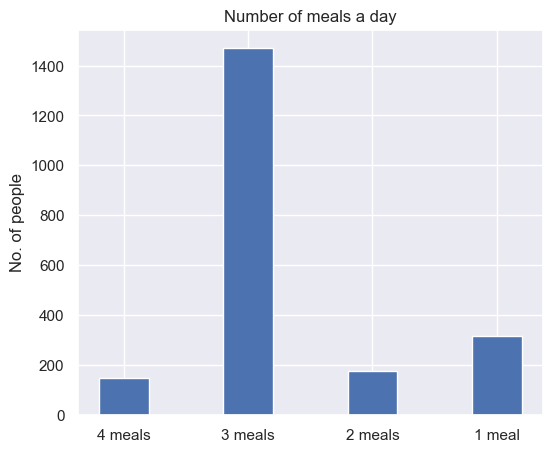

In [110]:
fig = plt.figure(figsize = (6, 5))

x = np.linspace(1, 4, 4)
plt.bar(x, num_meals, width = 0.4)
plt.xticks(ticks = [1, 2, 3, 4], labels = ['4 meals', '3 meals', '2 meals', '1 meal'])
#plt.xlabel("Vegetable Consumption")
plt.ylabel("No. of people")
plt.title("Number of meals a day")
plt.show()

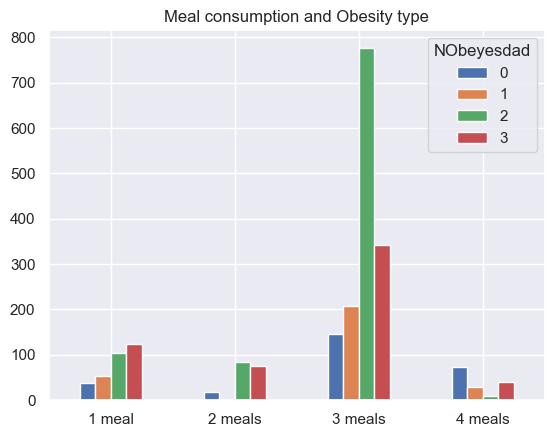

In [111]:
# plotting bar chart to vizualise peoples calorie consumption along with obesity type
df.groupby(['NCP','NObeyesdad']).size().unstack().plot(kind='bar',stacked=False)
plt.xticks(ticks = [0, 1, 2, 3], labels = ['1 meal', '2 meals', '3 meals', '4 meals'], rotation = '0')
plt.title('Meal consumption and Obesity type')
plt.xlabel('')
#plt.savefig('Meal consumption and Obesity type.png')
plt.show()

In [41]:
df.CAEC.unique()

array([2, 1, 0, 3])

In [42]:
num_bw_meal_always = df[df['CAEC'] == 0]
num_bw_meal_frq = df[df['CAEC'] == 1]
num_bw_meal_st = df[df['CAEC'] == 2]
num_bw_meal_no = df[df['CAEC'] == 3]

print("Number of people who always eat between meals: ", len(num_bw_meal_always))
print("Number of people who frequently eat between meals: ", len(num_bw_meal_frq))
print("Number of people who somtimes eat between meals: ", len(num_bw_meal_st))
print("Number of people who never eat between meals: ", len(num_bw_meal_no))

bw_meals = [len(num_bw_meal_always), len(num_bw_meal_frq), len(num_bw_meal_st), len(num_bw_meal_no)]
Unique_bw_meals = [df.CAEC.unique()]

Number of people who always eat between meals:  53
Number of people who frequently eat between meals:  242
Number of people who somtimes eat between meals:  1765
Number of people who never eat between meals:  51


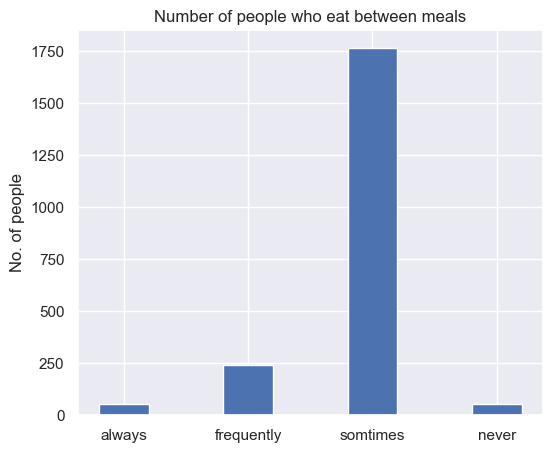

In [112]:
fig = plt.figure(figsize = (6, 5))

x = np.linspace(1, 4, 4)
plt.bar(x, bw_meals, width = 0.4)
plt.xticks(ticks = [1, 2, 3, 4], labels = ['always', 'frequently', 'somtimes', 'never'])
#plt.xlabel("Vegetable Consumption")
plt.ylabel("No. of people")
plt.title("Number of people who eat between meals")
plt.show()

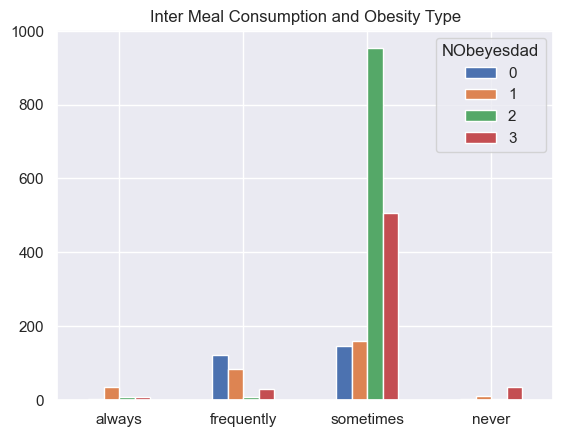

In [113]:
# plotting bar chart to vizualise peoples calorie consumption along with obesity type
df.groupby(['CAEC','NObeyesdad']).size().unstack().plot(kind='bar',stacked=False)
plt.xticks(ticks = [0, 1, 2, 3], labels = ['always', 'frequently', 'sometimes', 'never'], rotation = '0')
plt.title('Inter Meal Consumption and Obesity Type')
plt.xlabel('')
#plt.savefig('Inter Meal Consumption and Obesity Type.png')
plt.show()

In [114]:
num_smoke = df[df['SMOKE'] == 1]
print("Number of people who smoke: ", len(num_smoke))
print("Number of people who don't smoke: ", df.shape[0] - len(num_smoke))

Number of people who smoke:  44
Number of people who don't smoke:  2067


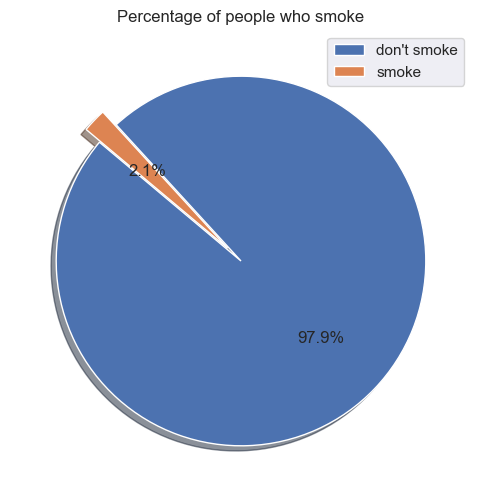

In [115]:
plt.figure(figsize=(6,6))
explode = [0,0.1]
plt.pie(df['SMOKE'].value_counts(), explode=explode, 
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.legend(labels=['don\'t smoke', 'smoke'])
plt.title('Percentage of people who smoke')
plt.axis('off')
plt.show()

In [47]:
# performing data wrangling on CH2O
for i in range(df.shape[0]):
    df.CH2O[i] = np.round(df.CH2O[i])

C:\Users\Echo\AppData\Local\Temp\ipykernel_10540\1201230618.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.CH2O[i] = np.round(df.CH2O[i])


In [48]:
df.CH2O.unique()

array([2., 3., 1.])

In [49]:
num_h2O_2l_plus = df[df['CH2O'] == 3.0]
num_h2O_1l_2l = df[df['CH2O'] == 2.0]
num_veg_less_1l = df[df['CH2O'] == 1.0]

print("Number of people who drink more than 2 liters of water: ", len(num_h2O_2l_plus))
print("Number of people who drink between 1 and 2 liters of water: ", len(num_h2O_1l_2l))
print("Number of people who drink less than 1 liters of water: ", len(num_veg_less_1l))

H2O_con = [len(num_h2O_2l_plus), len(num_h2O_1l_2l), len(num_veg_less_1l)]
Unique_H2O_con = [df.CH2O.unique()]

Number of people who drink more than 2 liters of water:  516
Number of people who drink between 1 and 2 liters of water:  1110
Number of people who drink less than 1 liters of water:  485


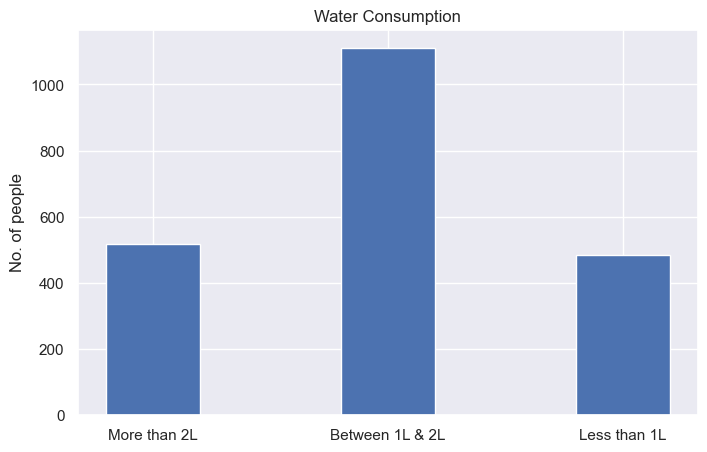

In [116]:
fig = plt.figure(figsize = (8, 5))

x = np.linspace(1, 3, 3)
plt.bar(x, H2O_con, width = 0.4)
plt.xticks(ticks = [1, 2, 3], labels = ['More than 2L', 'Between 1L & 2L', 'Less than 1L'])
#plt.xlabel("Vegetable Consumption")
plt.ylabel("No. of people")
plt.title("Water Consumption")
plt.show()

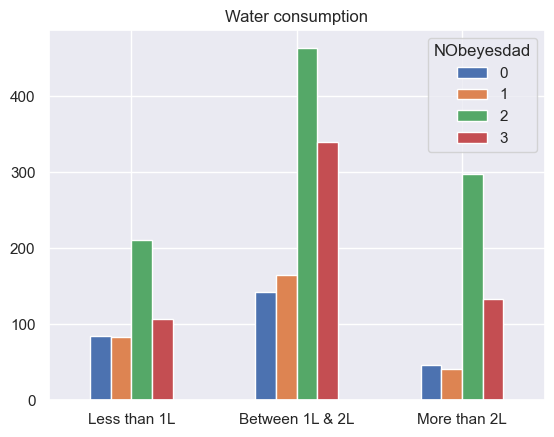

In [117]:
df.groupby(['CH2O','NObeyesdad']).size().unstack().plot(kind='bar',stacked=False)
plt.xticks(ticks = [0, 1, 2], labels = ['Less than 1L', 'Between 1L & 2L', 'More than 2L'],
          rotation = '0')
plt.title('Water consumption')
plt.xlabel('')
plt.show()

In [52]:
num_cal_con_mon = df[df['SCC'] == 1]
print("Number of people who monitor calorie consumption: ", len(num_cal_con_mon))
print("Number of people who don't monitor calorie consumption: ", df.shape[0] - len(num_cal_con_mon))

Number of people who monitor calorie consumption:  96
Number of people who don't monitor calorie consumption:  2015


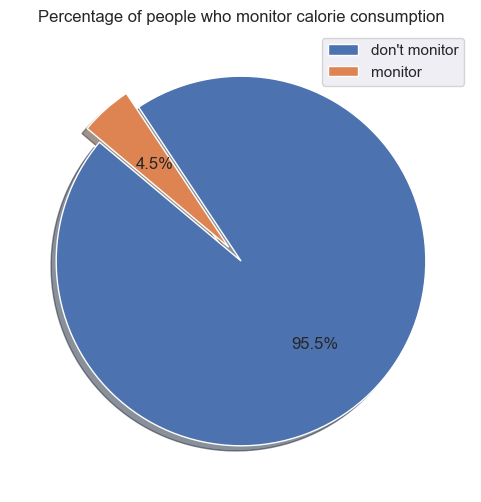

In [118]:
plt.figure(figsize=(6,6))
explode = [0,0.1]
plt.pie(df['SCC'].value_counts(), explode=explode, 
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.legend(labels=['don\'t monitor', 'monitor'])
plt.title('Percentage of people who monitor calorie consumption')
plt.axis('off')
plt.show()

In [54]:
# performing data wrangling on FAF
for i in range(df.shape[0]):
    df.FAF[i] = np.round(df.FAF[i])

C:\Users\Echo\AppData\Local\Temp\ipykernel_10540\2710984140.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.FAF[i] = np.round(df.FAF[i])


In [55]:
df.FAF.unique()

array([0., 3., 2., 1.])

In [56]:
num_phy_freq_never = df[df['FAF'] == 0]
num_phy_freq_sometime = df[df['FAF'] == 1]
num_phy_freq_moderate = df[df['FAF'] == 2]
num_phy_freq_high = df[df['FAF'] == 3]

print("Number of people who never exercise: ", len(num_phy_freq_never))
print("Number of people who sometimes excercise: ", len(num_phy_freq_sometime))
print("Number of people who moderately excercise: ", len(num_phy_freq_moderate))
print("Number of people who regularly excercise: ", len(num_phy_freq_high))

phy_act_freq = [len(num_phy_freq_never), len(num_phy_freq_sometime), len(num_phy_freq_moderate), len(num_phy_freq_high)]
Unique_phy_act = [df.FAF.unique()]

Number of people who never exercise:  720
Number of people who sometimes excercise:  776
Number of people who moderately excercise:  496
Number of people who regularly excercise:  119


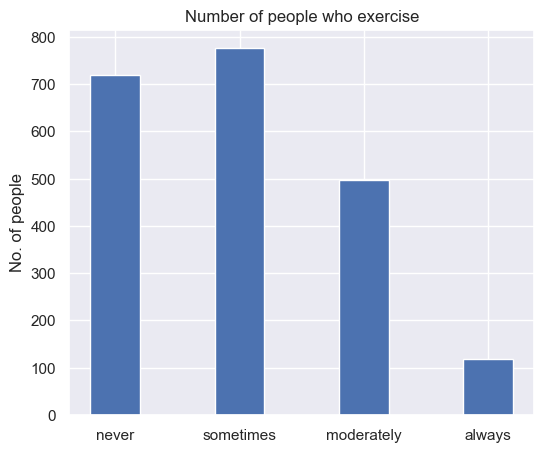

In [119]:
fig = plt.figure(figsize = (6, 5))

x = np.linspace(1, 4, 4)
plt.bar(x, phy_act_freq, width = 0.4)
plt.xticks(ticks = [1, 2, 3, 4], labels = ['never', 'sometimes', 'moderately', 'always'])
#plt.xlabel("Vegetable Consumption")
plt.ylabel("No. of people")
plt.title("Number of people who exercise")

plt.show()

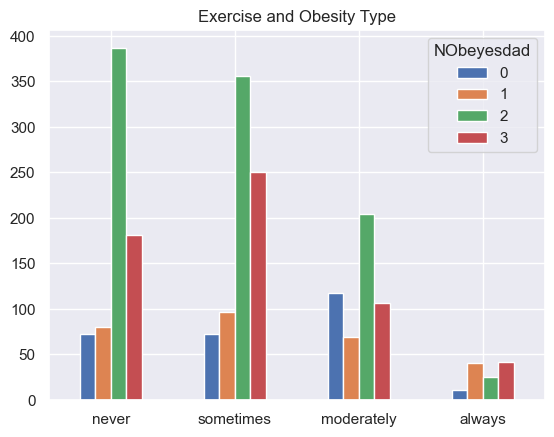

In [120]:
# plotting bar chart to vizualise peoples calorie consumption along with obesity type
df.groupby(['FAF','NObeyesdad']).size().unstack().plot(kind='bar',stacked=False)
plt.xticks(ticks = [0, 1, 2, 3], labels = ['never', 'sometimes', 'moderately', 'always'], rotation = '0')
plt.title('Exercise and Obesity Type')
plt.xlabel('')
plt.savefig('Exercise and Obesity Type.png')
plt.show()

In [59]:
# performing data wrangling on TUE
for i in range(df.shape[0]):
    df.TUE[i] = np.round(df.TUE[i])

C:\Users\Echo\AppData\Local\Temp\ipykernel_10540\205837546.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.TUE[i] = np.round(df.TUE[i])


In [60]:
df.TUE.unique()

array([1., 0., 2.])

In [61]:
num_tue_ot2 = df[df['TUE'] == 0]
num_tue_3t5 = df[df['TUE'] == 1]
num_tue_mt5 = df[df['TUE'] == 2]

print("Number of people using 0 to 2 time using tech devices: ", len(num_tue_ot2))
print("Number of people using 3 to 5 time using tech devices: ", len(num_tue_3t5))
print("Number of people using more than 5 time using tech devices: ", len(num_tue_mt5))

tue = [len(num_tue_ot2), len(num_tue_3t5), len(num_tue_mt5)]
Unique_tue = [df.TUE.unique()]

Number of people using 0 to 2 time using tech devices:  952
Number of people using 3 to 5 time using tech devices:  915
Number of people using more than 5 time using tech devices:  244


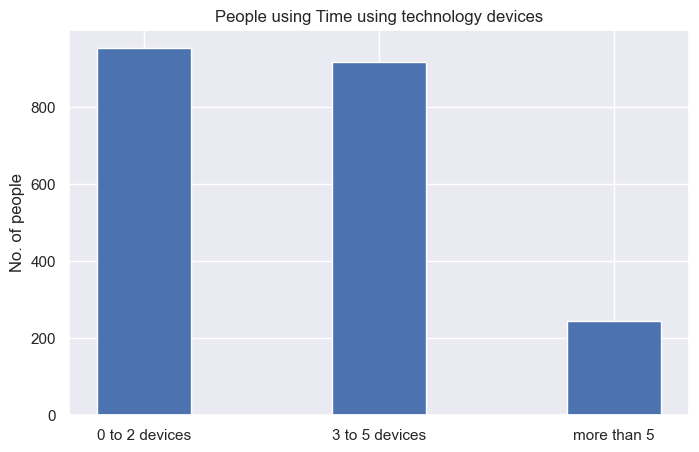

In [121]:
fig = plt.figure(figsize = (8, 5))

x = np.linspace(1, 3, 3)
plt.bar(x, tue, width = 0.4)
plt.xticks(ticks = [1, 2, 3], labels = ['0 to 2 devices', '3 to 5 devices', 'more than 5'])
#plt.xlabel("Vegetable Consumption")
plt.ylabel("No. of people")
plt.title("People using Time using technology devices")
plt.show()

In [63]:
df.MTRANS.unique()

array([3, 4, 0, 2, 1])

In [64]:
public_trans = df[df['MTRANS'] == 3]
walking = df[df['MTRANS'] == 4]
automobile = df[df['MTRANS'] == 0]
moterbike = df[df['MTRANS'] == 2]
bike = df[df['MTRANS'] == 1]


print("Number of people who use public transport: ", len(public_trans))
print("Number of people who walk: ", len(walking))
print("Number of people who use automobile: ", len(automobile))
print("Number of people who use moterbike: ", len(moterbike))
print("Number of people who use bike: ", len(bike))

mod_of_trans = [len(public_trans), len(walking), len(automobile), len(moterbike), len(bike)]
Unique_mod_of_trans = [df.MTRANS.unique()]

Number of people who use public transport:  1580
Number of people who walk:  56
Number of people who use automobile:  457
Number of people who use moterbike:  11
Number of people who use bike:  7


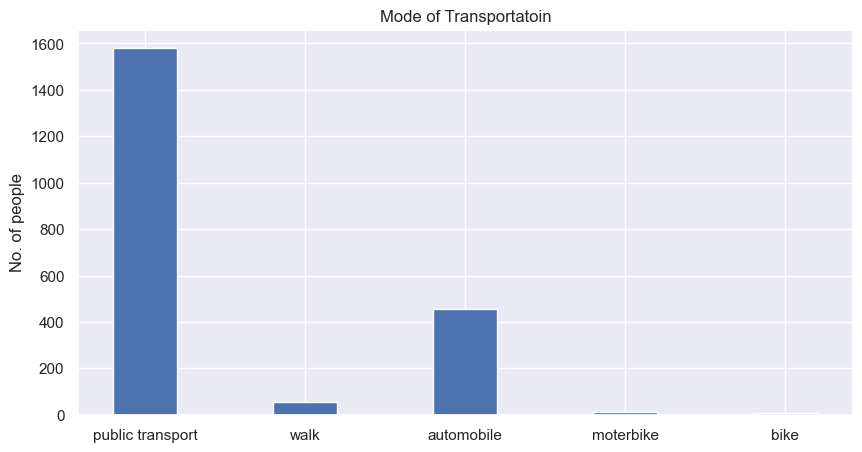

In [122]:
fig = plt.figure(figsize = (10, 5))

x = np.linspace(1, 5, 5)
plt.bar(x, mod_of_trans, width = 0.4, align = 'center')
plt.xticks(ticks = [1, 2, 3, 4, 5], labels = ['public transport', 'walk', 'automobile', 'moterbike', 'bike'])
#plt.xlabel("Vegetable Consumption")
plt.ylabel("No. of people")
plt.title("Mode of Transportatoin")
plt.show()

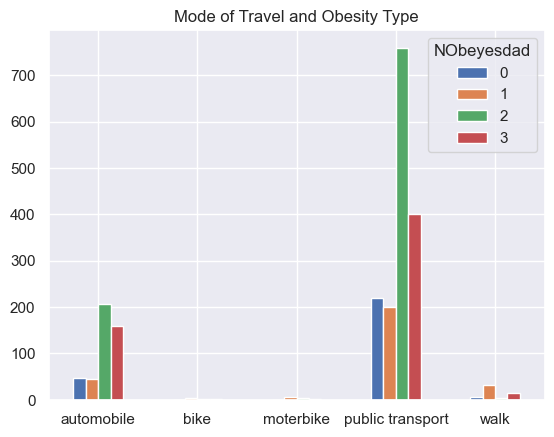

In [123]:
# plotting bar chart to vizualise peoples calorie consumption along with obesity type
df.groupby(['MTRANS','NObeyesdad']).size().unstack().plot(kind='bar',stacked=False)
plt.xticks(ticks = [0, 1, 2, 3, 4], labels = ['automobile', 'bike', 'moterbike', 'public transport', 'walk'], rotation = '0')
plt.title('Mode of Travel and Obesity Type')
plt.xlabel('')
plt.savefig('Mode of travel and obesity.png')
plt.show()

In [124]:
num_insuff = df[df['NObeyesdad'] == 0]
num_nor = df[df['NObeyesdad'] == 1]
num_obe = df[df['NObeyesdad'] == 2]
num_ow = df[df['NObeyesdad'] == 3]

print("Number of people with Insufficient Weight: ", len(num_insuff))
print("Number of people with Normal Weight: ", len(num_nor))
print("Number of people with Obesity: ", len(num_obe))
print("Number of people with Over Weight: ", len(num_ow))

obe_type = [len(num_insuff), len(num_nor), len(num_obe), len(num_ow)]
Unique_obe_type = [df.NObeyesdad.unique()]

Number of people with Insufficient Weight:  272
Number of people with Normal Weight:  287
Number of people with Obesity:  972
Number of people with Over Weight:  580


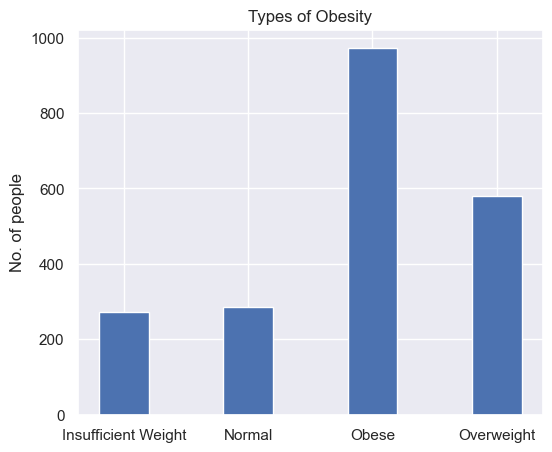

In [125]:
fig = plt.figure(figsize = (6, 5))

x = np.linspace(1, 4, 4)
plt.bar(x, obe_type, width = 0.4)
plt.xticks(ticks = [1, 2, 3, 4], labels = ['Insufficient Weight', 'Normal', 'Obese', 'Overweight'])
#plt.xlabel("Vegetable Consumption")
plt.ylabel("No. of people")
plt.title("Types of Obesity")
plt.savefig('types of obesity.png')
plt.show()

In [69]:
corr_matrix = df.corr()
corr_matrix

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
Gender,1.000000,0.050677,0.618466,0.161668,0.102512,0.064934,-0.261788,0.071870,0.091543,0.044698,0.076129,-0.102633,0.192531,0.000270,0.007616,-0.137537,0.114085
Age,0.050677,1.000000,-0.030738,0.190263,0.195552,0.055872,0.001102,-0.046865,0.074851,0.097897,-0.024890,-0.111882,-0.132018,-0.288840,-0.043344,-0.601020,0.285029
Height,0.618466,-0.030738,1.000000,0.463136,0.247684,0.178364,-0.053772,0.244055,0.048818,0.055499,0.180895,-0.133753,0.290594,0.058097,-0.129732,-0.073609,0.050692
Weight,0.161668,0.190263,0.463136,1.000000,0.496820,0.272300,0.178952,0.103273,0.287493,0.025746,0.186316,-0.201906,-0.047948,-0.039376,-0.206677,0.004610,0.418428
family_history_with_overweight,0.102512,0.195552,0.247684,0.496820,1.000000,0.208036,0.023212,0.063365,0.169787,0.017385,0.140150,-0.185422,-0.052682,0.025262,0.036676,-0.101540,0.358684
FAVC,0.064934,0.055872,0.178364,0.272300,0.208036,1.000000,-0.031019,-0.006363,0.150068,-0.050660,0.014174,-0.190658,-0.099741,0.063278,-0.089520,-0.069800,0.086526
FCVC,-0.261788,0.001102,-0.053772,0.178952,0.023212,-0.031019,1.000000,0.011111,-0.054086,0.007760,0.061140,0.075343,0.013661,-0.077269,-0.044279,0.073022,-0.096617
NCP,0.071870,-0.046865,0.244055,0.103273,0.063365,-0.006363,0.011111,1.000000,-0.094589,0.007110,0.063477,-0.014132,0.130322,0.013010,-0.077209,-0.058149,-0.151577
CAEC,0.091543,0.074851,0.048818,0.287493,0.169787,0.150068,-0.054086,-0.094589,1.000000,-0.055282,0.134200,-0.109179,-0.026015,-0.042935,-0.047540,-0.048535,0.361829
SMOKE,0.044698,0.097897,0.055499,0.025746,0.017385,-0.050660,0.007760,0.007110,-0.055282,1.000000,-0.036827,0.047731,0.010031,0.008646,-0.082471,-0.010702,-0.006140


C:\Users\Echo\AppData\Local\Temp\ipykernel_10540\821552577.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(corr_matrix.columns)
C:\Users\Echo\AppData\Local\Temp\ipykernel_10540\821552577.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(corr_matrix.columns)


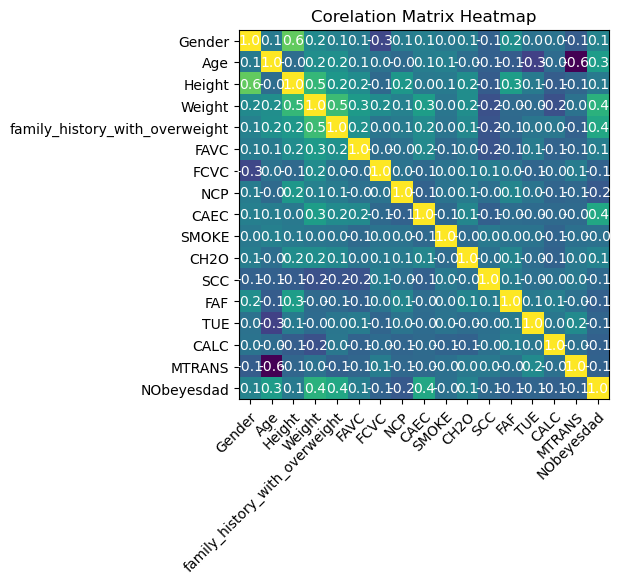

In [70]:
fig, ax = plt.subplots()
corr_matrix = df.corr()
im = ax.imshow(corr_matrix)

ax.set_xticklabels(corr_matrix.columns)
ax.set_yticklabels(corr_matrix.columns)
ax.set_xticks(np.arange(len(corr_matrix.columns)))
ax.set_yticks(np.arange(len(corr_matrix.columns)))

# Rotate the tick labels and set their alignment
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        text = ax.text(j, i, '{:.1f}'.format(corr_matrix.iloc[i, j]),
                       ha="center", va="center", color="w")

plt.title('Corelation Matrix Heatmap')
plt.savefig('Corr matrix.png')
plt.show()

# Clustering

In [71]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, completeness_score, homogeneity_score

In [72]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit_transform(df.drop(columns = 'NObeyesdad', axis = 1))
y_kmeans = kmeans.predict(df.drop(columns = 'NObeyesdad', axis = 1))

In [73]:
np.unique(kmeans.labels_)

array([0, 1, 2, 3])

In [74]:
sil_score = silhouette_score(df.drop(columns = 'NObeyesdad', axis = 1), kmeans.labels_, metric='euclidean')
print('Silhouette Score: %.3f' % sil_score)

Silhouette Score: 0.473


In [75]:
com_score = completeness_score(df.NObeyesdad, kmeans.labels_)
print('Completeness Score: %.3f' % com_score)

Completeness Score: 0.462


In [76]:
hom_score = homogeneity_score(df.NObeyesdad, kmeans.labels_)
print('homogeneity Score: %.3f' % hom_score)

homogeneity Score: 0.490


In [77]:
sil_scores = []
hom_scores = []
com_scores = []

for i in range(2, 50):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit_transform(df)
    y_kmeans = kmeans.predict(df)
    sil_scores.append(silhouette_score(df, kmeans.labels_, metric='euclidean'))
    hom_scores.append(homogeneity_score(df.NObeyesdad, kmeans.labels_))
    com_scores.append(completeness_score(df.NObeyesdad, kmeans.labels_))

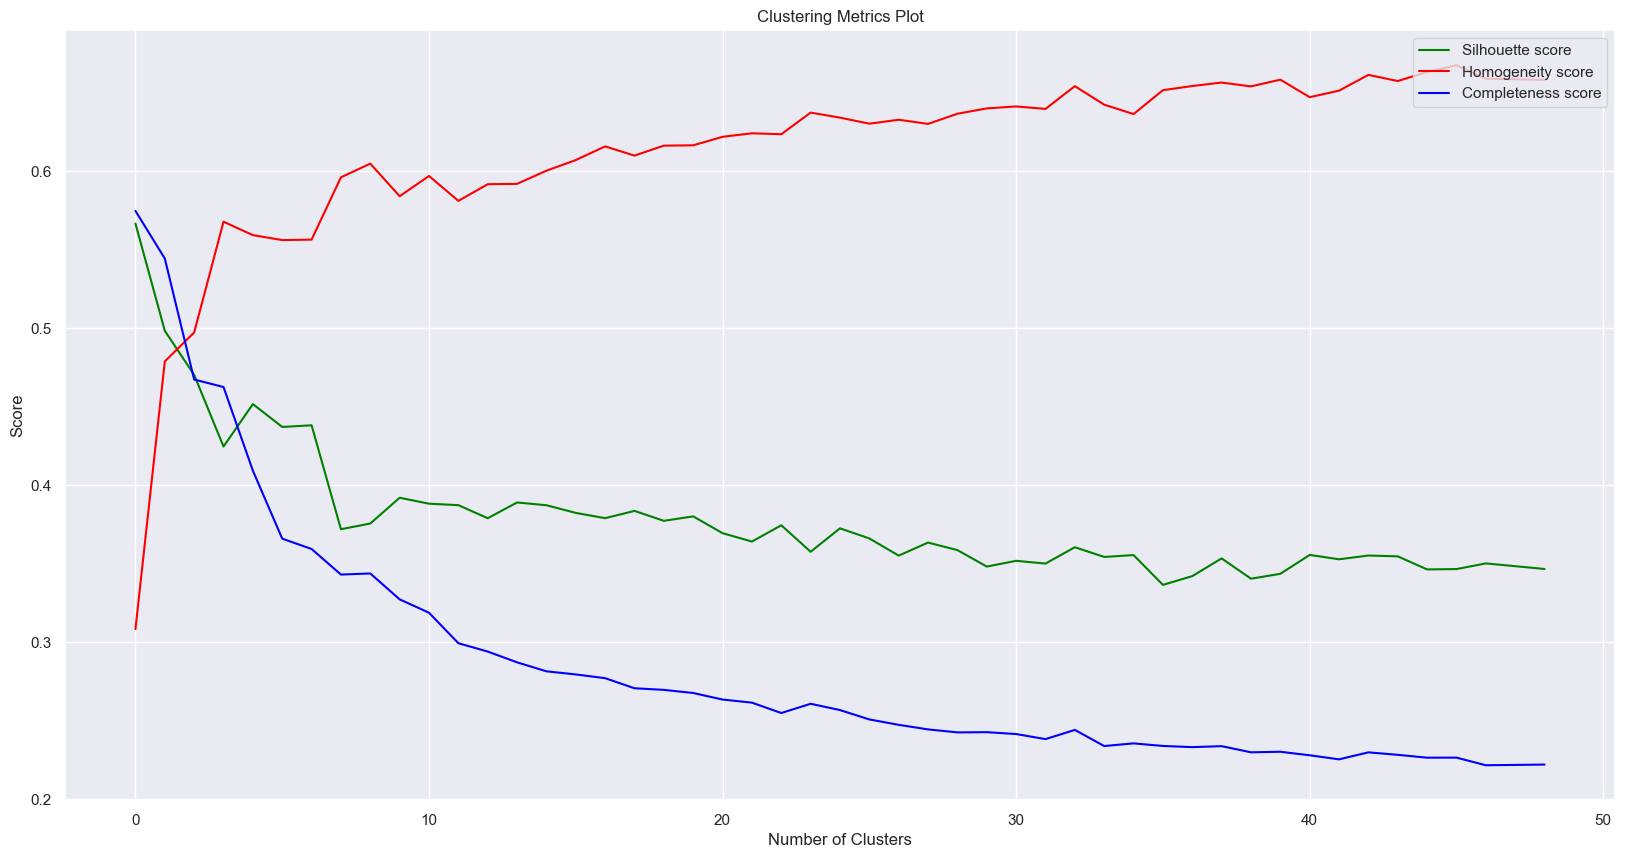

In [126]:
x = np.linspace(0, 48, 48, dtype = int)
plt.figure(figsize=(20, 10))

plt.plot(x, sil_scores, color='green')
plt.plot(x, hom_scores, color='red')
plt.plot(x, com_scores, color='blue')
plt.title('Clustering Metrics Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.legend(['Silhouette score', 'Homogeneity score', 'Completeness score'], loc ="upper right")
plt.savefig('Clustering Metrics Plot.png');

In [79]:
sse = []
k_rng = range(1, 10)
for i in k_rng:
    km = KMeans(n_clusters = i)
    km.fit(df)
    sse.append(km.inertia_)
print(sse)

[1544661.1525179297, 506900.9587010705, 285083.9344915573, 199918.56148900997, 162105.81490479445, 128915.02119353623, 102207.1514573541, 92501.64215015896, 84053.24526380622]


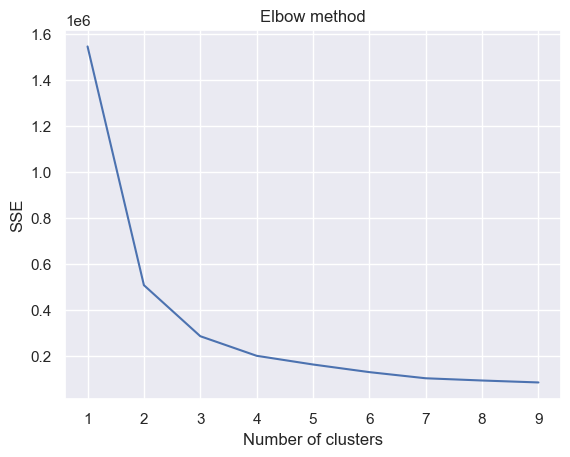

In [127]:
plt.plot(k_rng, sse)
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE');
plt.savefig('Elbow Method.png');

# Performing Upervised Learning

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('NObeyesdad', axis=1), df.NObeyesdad, test_size=0.3)

In [82]:
print('Number of record in X_train: ', len(X_train))
print('Number of record in X_test: ', len(X_test))
print('Number of record in y_train: ', len(y_train))
print('Number of record in y_test: ', len(y_test))

Number of record in X_train:  1477
Number of record in X_test:  634
Number of record in y_train:  1477
Number of record in y_test:  634


In [83]:
X_train.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
1515,1,37,1.704877,107.947470,1,1,3.0,4.0,2,0,1.0,0,2.0,0.0,3,3
626,1,17,1.811238,58.830710,1,1,2.0,4.0,2,0,2.0,0,2.0,1.0,3,0
1759,1,30,1.759647,120.009392,1,1,3.0,3.0,2,0,2.0,0,1.0,1.0,2,0
1946,0,23,1.637524,113.905060,1,1,3.0,3.0,2,0,2.0,0,0.0,1.0,2,3
1204,0,35,1.663178,80.135167,1,1,2.0,3.0,2,0,2.0,0,0.0,2.0,3,0


In [84]:
y_train.head()

1515    2
626     0
1759    2
1946    2
1204    3
Name: NObeyesdad, dtype: int32

In [85]:
# importing machine learing models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [86]:
model_params = {
    'logistic_regression' : {
        'model' : LogisticRegression(),
        'params' : {
            'C' : [1, 5, 10], 
            'fit_intercept' : [True, False],
                    } 
    },
    'kneighbours_classifier' : {
        'model' : KNeighborsClassifier(),
        'params' : {
            'n_neighbors' : [1, 5, 10],
            'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
            'weights' : ['uniform', 'distance']
        }
    },
    'decisiontree_classifier' : {
        'model' : DecisionTreeClassifier(),
        'params' : {
            'criterion' : ['gini', 'entropy', 'log_loss'],
            'splitter' : ['best', 'random']
        }
    },
    'naive_bayes' : {
        'model' : GaussianNB(),
        'params': {
        
                    }       
    }
    
}



In [87]:
scores = []

for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv = 5, return_train_score = False)
    clf.fit(df.drop('NObeyesdad', axis=1), df.NObeyesdad)
    scores.append({
        'model': model_name,
        'best_score' : clf.best_score_,
        'best_params' : clf.best_params_
    })

C:\Users\Echo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Echo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\Echo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Echo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\Echo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Echo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

C:\Users\Echo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Echo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

C:\Users\Echo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Echo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

In [88]:
scores

[{'model': 'logistic_regression',
  'best_score': 0.7584820678296529,
  'best_params': {'C': 5, 'fit_intercept': False}},
 {'model': 'kneighbours_classifier',
  'best_score': 0.9005523623855781,
  'best_params': {'algorithm': 'auto',
   'n_neighbors': 1,
   'weights': 'uniform'}},
 {'model': 'decisiontree_classifier',
  'best_score': 0.945558132499748,
  'best_params': {'criterion': 'entropy', 'splitter': 'best'}},
 {'model': 'naive_bayes', 'best_score': 0.6333523803121464, 'best_params': {}}]

In [89]:
model = DecisionTreeClassifier(criterion = 'entropy', splitter= 'best')
model

DecisionTreeClassifier(criterion='entropy')

In [90]:
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [91]:
y_pred = model.predict(X_test)

In [92]:
y_pred

array([3, 2, 2, 2, 2, 1, 2, 1, 2, 3, 2, 2, 3, 2, 2, 2, 2, 1, 2, 3, 0, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 3, 1, 2, 0, 2, 0, 2, 2, 2, 2, 0, 3, 3, 0,
       3, 1, 1, 2, 3, 2, 0, 3, 2, 3, 2, 3, 0, 3, 2, 2, 2, 2, 3, 2, 2, 2,
       2, 2, 3, 2, 0, 2, 2, 0, 2, 1, 1, 2, 3, 0, 3, 2, 3, 1, 3, 3, 2, 2,
       2, 2, 2, 3, 3, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 2, 3, 0, 2, 3, 2, 2,
       0, 2, 2, 0, 0, 0, 2, 3, 3, 1, 0, 2, 2, 2, 3, 0, 1, 2, 1, 3, 3, 1,
       1, 2, 0, 2, 0, 1, 1, 2, 0, 2, 3, 0, 2, 3, 3, 2, 2, 1, 2, 1, 1, 0,
       2, 2, 2, 1, 1, 3, 1, 2, 1, 1, 2, 3, 3, 3, 1, 3, 3, 3, 1, 3, 2, 0,
       0, 2, 2, 2, 3, 0, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0,
       2, 3, 2, 0, 3, 3, 3, 2, 3, 2, 0, 2, 1, 3, 2, 1, 0, 3, 2, 3, 1, 0,
       2, 2, 3, 0, 3, 0, 0, 3, 3, 2, 3, 1, 2, 1, 3, 0, 3, 2, 1, 3, 3, 3,
       2, 1, 2, 2, 0, 2, 2, 2, 3, 0, 2, 1, 1, 2, 2, 1, 3, 2, 1, 2, 2, 2,
       2, 3, 3, 2, 2, 3, 3, 1, 3, 2, 0, 2, 2, 2, 2, 3, 2, 1, 2, 2, 2, 2,
       1, 2, 2, 3, 2, 3, 1, 0, 2, 3, 2, 3, 2, 2, 2,

In [93]:
model_score = model.score(X_test, y_test)
print('Our model performs with the accuracy of :', model_score*100, '%')

Our model performs with the accuracy of : 96.52996845425868 %


In [94]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X_test, y_test, cv=10)

array([0.921875  , 0.890625  , 0.96875   , 0.96875   , 0.95238095,
       0.95238095, 0.9047619 , 0.95238095, 0.95238095, 0.95238095])

In [95]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        88
           1       0.91      0.93      0.92        84
           2       0.98      1.00      0.99       281
           3       0.98      0.92      0.95       181

    accuracy                           0.97       634
   macro avg       0.96      0.96      0.96       634
weighted avg       0.97      0.97      0.97       634



In [96]:
from sklearn.metrics import precision_score
print('Precision Score Macro: ', precision_score(y_test, y_pred, average='macro'))
print('Precision Score Micro: ', precision_score(y_test, y_pred, average='micro'))
print('Precision Score Weighted: ', precision_score(y_test, y_pred, average='weighted'))

Precision Score Macro:  0.9564653385211943
Precision Score Micro:  0.9652996845425867
Precision Score Weighted:  0.9655601522287921


In [97]:
from sklearn.metrics import f1_score
print('f1 Score Macro: ', f1_score(y_test, y_pred, average='macro'))
print('f1 Score Micro: ', f1_score(y_test, y_pred, average='micro'))
print('f1 Score Weighted: ', f1_score(y_test, y_pred, average='weighted'))

f1 Score Macro:  0.9574885695081381
f1 Score Micro:  0.9652996845425867
f1 Score Weighted:  0.9651283857322299


In [98]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
confusionMatrix = confusion_matrix(y_test, y_pred)
confusionMatrix

array([[ 87,   1,   0,   0],
       [  3,  78,   0,   3],
       [  0,   0, 280,   1],
       [  0,   7,   7, 167]], dtype=int64)

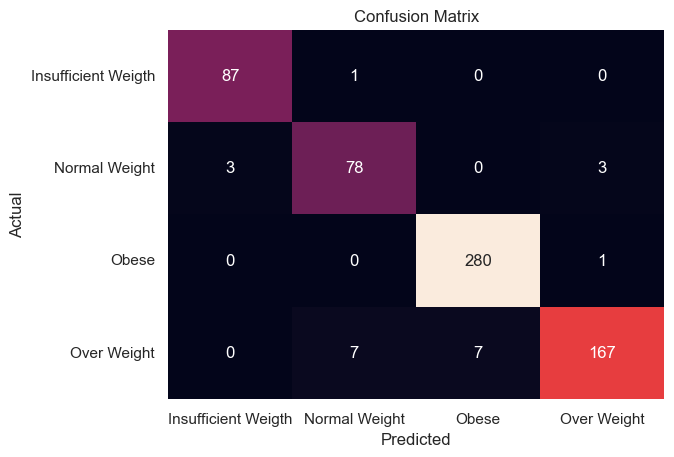

In [99]:
confusionMatrix = pd.DataFrame(confusionMatrix, range(4), range(4))
sns.set(font_scale=1) 
ax = sns.heatmap(confusionMatrix, annot=True, cbar = False, 
                 xticklabels = ['Insufficient Weigth', 'Normal Weight', 'Obese', 'Over Weight'],
                 yticklabels = ['Insufficient Weigth', 'Normal Weight', 'Obese', 'Over Weight'], 
                 fmt="g").set(title = 'Confusion Matrix')

plt.xlabel('Predicted')
plt.ylabel('Actual')
#plt.savefig('Confusion Matrix.png',pad_inches=2)
plt.show()